## Capstone Project 1: Nowplaying_rs Data Story

The nowplaying_rs dataset contained three files, the file containing listening events (LE"S) with user_d, track_id, hashtag, and created at columns had roughly 17.5 million LE's.  After a series of wrangling efforts; joining the three datasets, dropping duplicate rows, and filtering tracks with less that 10 occurances, we are left with a final dataframe of 4,068,079 LE's that includes spotify content features, list of tweets per track, and a created at timestamp.  Category codes have been assigned to the user_id, track_id, and artist_id columns, and the original columns preserved.  Extraneous columns such as htag, tweet_lang, lang, and Unnamed: 0 will be dropped here as they contain no relevant information.  The resulting data story is sourced from the final combined dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('NPRS_FINAL.csv')

In [3]:
print(df.shape)
df.head()

(4068079, 25)


,Unnamed: 0,user_id,track_id,created_at,ol_score,instrumentalness,liveness,speechiness,danceability,valence,...,key,artist_id,tweet_lang,lang,htag,tag,count,uid_code,tid_code,aid_code
0,0,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-01-01 05:54:21,0.6,0.00479,0.18,0.0294,0.634,0.342,...,6.0,b2980c722a1ace7a30303718ce5491d8,en,en,"['nowplaying', 'deathrock', 'postpunk', 'nowpl...","{'postpunk', 'deathrock', 'nowplaying'}",28,4121,42353,8489
1,1,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-02-19 11:21:51,0.6,0.00479,0.18,0.0294,0.634,0.342,...,6.0,b2980c722a1ace7a30303718ce5491d8,en,en,"['nowplaying', 'deathrock', 'postpunk', 'nowpl...","{'postpunk', 'deathrock', 'nowplaying'}",28,4121,42353,8489
2,2,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-03-02 15:28:20,0.6,0.00479,0.18,0.0294,0.634,0.342,...,6.0,b2980c722a1ace7a30303718ce5491d8,en,en,"['nowplaying', 'deathrock', 'postpunk', 'nowpl...","{'postpunk', 'deathrock', 'nowplaying'}",28,4121,42353,8489
3,3,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-03-04 01:32:31,0.6,0.00479,0.18,0.0294,0.634,0.342,...,6.0,b2980c722a1ace7a30303718ce5491d8,en,en,"['nowplaying', 'deathrock', 'postpunk', 'nowpl...","{'postpunk', 'deathrock', 'nowplaying'}",28,4121,42353,8489
4,4,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-04-07 20:20:46,0.6,0.00479,0.18,0.0294,0.634,0.342,...,6.0,b2980c722a1ace7a30303718ce5491d8,en,en,"['nowplaying', 'deathrock', 'postpunk', 'nowpl...","{'postpunk', 'deathrock', 'nowplaying'}",28,4121,42353,8489


In [4]:
df = df.drop(['Unnamed: 0','tweet_lang','lang','htag'],axis=1)

In [5]:
df.head(3)

,user_id,track_id,created_at,ol_score,instrumentalness,liveness,speechiness,danceability,valence,loudness,...,acousticness,energy,mode,key,artist_id,tag,count,uid_code,tid_code,aid_code
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-01-01 05:54:21,0.6,0.00479,0.18,0.0294,0.634,0.342,-8.345,...,0.00035,0.697,1.0,6.0,b2980c722a1ace7a30303718ce5491d8,"{'postpunk', 'deathrock', 'nowplaying'}",28,4121,42353,8489
1,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-02-19 11:21:51,0.6,0.00479,0.18,0.0294,0.634,0.342,-8.345,...,0.00035,0.697,1.0,6.0,b2980c722a1ace7a30303718ce5491d8,"{'postpunk', 'deathrock', 'nowplaying'}",28,4121,42353,8489
2,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-03-02 15:28:20,0.6,0.00479,0.18,0.0294,0.634,0.342,-8.345,...,0.00035,0.697,1.0,6.0,b2980c722a1ace7a30303718ce5491d8,"{'postpunk', 'deathrock', 'nowplaying'}",28,4121,42353,8489


Since the data is mainly categorical we will construct bar charts showing counts, and then plot distributions of the Spotify content features, in addition to time series plots.

In [6]:
#look at some dataset characteristics
num_users = df.uid_code.nunique()
num_songs = df.tid_code.nunique()
num_artists = df.aid_code.nunique()

print(f"Number of unique users: {num_users}")
print(f"Number of unique songs: {num_songs}")
print(f"Number of unique artists: {num_artists}")
print(f"Number of listening events: {df.shape[0]}")

Number of unique users: 18386
Number of unique songs: 52695
Number of unique artists: 12038
Number of listening events: 4068079


In [7]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [8]:
sort_date = df.sort_values(by=['created_at'])

In [9]:
sort_date.head()

,user_id,track_id,created_at,ol_score,instrumentalness,liveness,speechiness,danceability,valence,loudness,...,acousticness,energy,mode,key,artist_id,tag,count,uid_code,tid_code,aid_code
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-01-01 05:54:21,0.6,0.004790,0.180,0.0294,0.634,0.342,-8.345,...,0.00035,0.697,1.0,6.0,b2980c722a1ace7a30303718ce5491d8,"{'postpunk', 'deathrock', 'nowplaying'}",28,4121,42353,8489
28,97675221,33f95122281f76e7134f9cbea3be980f,2014-01-01 05:54:24,0.6,0.000000,0.143,0.0292,0.324,0.333,-5.647,...,0.23900,0.574,1.0,7.0,557ce373bd29743eb00a3723ab19ebe8,{'nowplaying'},25,4696,10760,4076
53,452285741,8bd5206b84c968eda0af8bc86d6ab1d1,2014-01-01 05:54:25,0.6,0.000000,0.110,0.0375,0.641,0.912,-4.271,...,0.02680,0.787,1.0,0.0,f965ec352eb8c0efc0af46244754942f,{'nowplaying'},247,11096,28822,11749
300,65086276,23ced06ca57d37fa749b1595bc7ed1a4,2014-01-01 05:54:28,0.6,0.000006,0.362,0.1340,0.554,0.677,-4.271,...,0.02160,0.878,1.0,3.0,a3abd1e016fdba82a91379b7e2b9ab69,{'nowplaying'},1708,3558,7451,7743
2008,442477849,fda40c07a07a15648760431850efc3d8,2014-01-01 05:54:32,0.6,0.000040,0.110,0.0675,0.387,0.197,-6.835,...,0.03720,0.898,1.0,8.0,6f8ce038bc50a5372fcaf86e4b300bb6,{'nowplaying'},242,10997,52219,5291


In [10]:
#move created at column to index
sort = sort_date.set_index('created_at')
sort.head()

,user_id,track_id,ol_score,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,artist_id,tag,count,uid_code,tid_code,aid_code
created_at,,,,,,,,,,,,,,,,,,,,
2014-01-01 05:54:21,81496937,cd52b3e5b51da29e5893dba82a418a4b,0.6,0.004790,0.180,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,1.0,6.0,b2980c722a1ace7a30303718ce5491d8,"{'postpunk', 'deathrock', 'nowplaying'}",28,4121,42353,8489
2014-01-01 05:54:24,97675221,33f95122281f76e7134f9cbea3be980f,0.6,0.000000,0.143,0.0292,0.324,0.333,-5.647,74.101,0.23900,0.574,1.0,7.0,557ce373bd29743eb00a3723ab19ebe8,{'nowplaying'},25,4696,10760,4076
2014-01-01 05:54:25,452285741,8bd5206b84c968eda0af8bc86d6ab1d1,0.6,0.000000,0.110,0.0375,0.641,0.912,-4.271,93.010,0.02680,0.787,1.0,0.0,f965ec352eb8c0efc0af46244754942f,{'nowplaying'},247,11096,28822,11749
2014-01-01 05:54:28,65086276,23ced06ca57d37fa749b1595bc7ed1a4,0.6,0.000006,0.362,0.1340,0.554,0.677,-4.271,126.045,0.02160,0.878,1.0,3.0,a3abd1e016fdba82a91379b7e2b9ab69,{'nowplaying'},1708,3558,7451,7743
2014-01-01 05:54:32,442477849,fda40c07a07a15648760431850efc3d8,0.6,0.000040,0.110,0.0675,0.387,0.197,-6.835,81.354,0.03720,0.898,1.0,8.0,6f8ce038bc50a5372fcaf86e4b300bb6,{'nowplaying'},242,10997,52219,5291


The dataset contains LE's from the year 2014.  We can plot the song count by day and see how it looks over the course of the year

In [11]:
days = sort.resample('D').size().to_frame()
days.columns = ['count']
days.head()

,count
created_at,
2014-01-01,9422
2014-01-02,13520
2014-01-03,13008
2014-01-04,12907
2014-01-05,12644


Text(0, 0.5, 'Count')

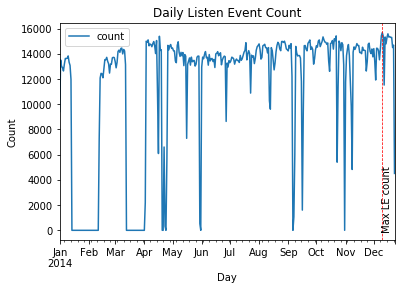

In [12]:
#plot daily song count as time series

days.plot()
plt.axvline(x=days['count'].idxmax(),color = 'red',linewidth=.75,linestyle='--')
plt.text(days['count'].idxmax(),0,'Max LE count',rotation=90)
plt.legend(loc=0)
plt.title('Daily Listen Event Count')
plt.xlabel('Day')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

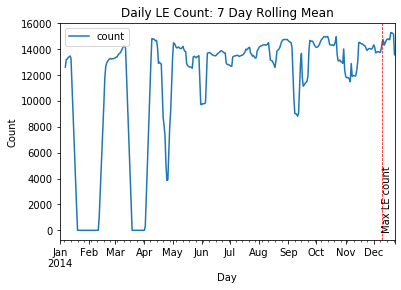

In [13]:
#Apply smoothing with 7 rolling mean
days.rolling(window=7).mean()['count'].plot()
plt.axvline(x=days['count'].idxmax(),color = 'red',linewidth=.75,linestyle='--')
plt.text(days['count'].idxmax(),0,'Max LE count',rotation=90)
plt.legend(loc=0)
plt.title('Daily LE Count: 7 Day Rolling Mean')
plt.xlabel('Day')
plt.ylabel('Count')

In [14]:
print(f" The day with the highest play count was {days['count'].idxmax()} and was {days['count'].max()} LE's")

 The day with the highest play count was 2014-12-10 00:00:00 and was 15683 LE's


There does not seem to be any particular reason that the song count for Dec. 10 2014 was the day with the most events. For a bit of context I reviewed the headlines from the day and nothing in particular appeared. Checking the Dec. 10 for a holiday did reveal that it is National Human Rights day, although I doubt that played any role in the high track count. In the context of the data, the count for the day does not seem for any reason other than coincidence. Subesequent to applying smoothing with a 7 day moving average there are only 7 periods that dip below 12,000 events, the count looks consistent with the track count being around 13,500. There are several days where the track count drops to zero or decrese by a large amount. This is most liekly due to and API being down or the crawler breaking in some other regard. The sudden decline indicates something breaking, and the sudden increase after a period of time suggest the author noticing and fixing any issues.

Lets take a look at time series plots for each of the spotify features.  We can obtain a general 'listening mood' or sample preference for a day if we understand what each feature represents.  Above each plot the feature explanations, defined by Spotify will be included for reference.  Currently, the 'sort' dataframe includes timestamps to the second. The dataframe will be resampled by day, and the mean value for the feature shown.  Smoothing will be applied to the plots with a rolling 7 day window.

In [15]:
#make subset of numerical features
subset = sort.iloc[:,3:12]
subset.head()

,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy
created_at,,,,,,,,,
2014-01-01 05:54:21,0.004790,0.180,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697
2014-01-01 05:54:24,0.000000,0.143,0.0292,0.324,0.333,-5.647,74.101,0.23900,0.574
2014-01-01 05:54:25,0.000000,0.110,0.0375,0.641,0.912,-4.271,93.010,0.02680,0.787
2014-01-01 05:54:28,0.000006,0.362,0.1340,0.554,0.677,-4.271,126.045,0.02160,0.878
2014-01-01 05:54:32,0.000040,0.110,0.0675,0.387,0.197,-6.835,81.354,0.03720,0.898


In [16]:
feat_cols = ['instrumentalness','liveness', 'speechiness', 'danceability', 
            'valence', 'loudness',
            'tempo', 'acousticness', 'energy']

In [17]:
day_feat = sort.resample('D')[feat_cols].mean()
day_feat.columns = feat_cols
day_feat.head()

,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy
created_at,,,,,,,,,
2014-01-01,0.103817,0.184548,0.057742,0.567390,0.528328,-7.843318,122.855324,0.229353,0.661547
2014-01-02,0.104517,0.185995,0.056844,0.560492,0.519135,-7.834318,122.433851,0.227646,0.664212
2014-01-03,0.104042,0.185623,0.057029,0.560039,0.524432,-7.840088,122.514746,0.224184,0.665376
2014-01-04,0.104597,0.185068,0.057543,0.558274,0.518651,-7.840968,122.490986,0.228144,0.664194
2014-01-05,0.109273,0.183950,0.057570,0.556550,0.516048,-7.930290,122.406125,0.231868,0.661349


## Spotify Feature Time Series Plots

Will these plots reveal any intersting trends? Lets take a look at time series plots for each of the spotify features.  We can obtain a general 'listening mood' for a day if we understand what each feature represents.  Above each plot the feature explanations, defined by Spotify will be included for reference.  Currently, the 'sort' dataframe includes timestamps to the second. The dataframe will be resampled by day, and the mean value for the feature shown.  Gaps in the data correspond to time periods where no data was collected.

Feature descriptions are taken from https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Instrumentalness:** Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal.” The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

Text(0, 0.5, 'feature_score')

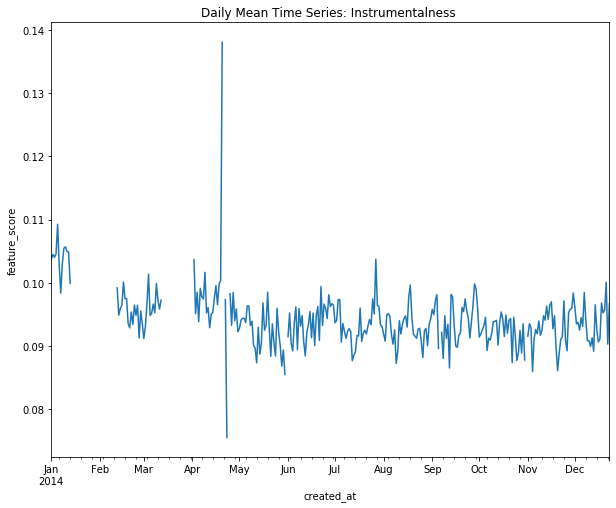

In [18]:
plt.figure(figsize=(10,8))
day_feat['instrumentalness'].plot()
plt.title('Daily Mean Time Series: Instrumentalness ')
plt.ylabel('feature_score')

In [19]:
print(f" The maximum value for the mean 'instrumentalness' variable is {round(day_feat['instrumentalness'].max(),4)}, and occured on {day_feat['instrumentalness'].idxmax()}")
print(f" The minimum value for the mean 'instrumentalness' variable is {round(day_feat['instrumentalness'].min(),4)}, and occured on {day_feat['instrumentalness'].idxmin()}")
print(f" Dataset 'instrumentalness' mean: {round(sort['instrumentalness'].mean(),4)}")

 The maximum value for the mean 'instrumentalness' variable is 0.1381, and occured on 2014-04-20 00:00:00
 The minimum value for the mean 'instrumentalness' variable is 0.0755, and occured on 2014-04-23 00:00:00
 Dataset 'instrumentalness' mean: 0.0941


There appears to be an outlier, indicated by the vertical spike in the chart.  After plotting some more features it was determined that there is something strange happening on April 20th.  Of the features plotted, all had the same spike ocurring on the same day.  In addition each features max mean value occured on that day.  Since it is a single day of the year this row will be dropped.

In [20]:
#Make new features dataframe with April 20th dropped
new_day = day_feat.drop(day_feat.index[109])

Text(0, 0.5, 'feature_score')

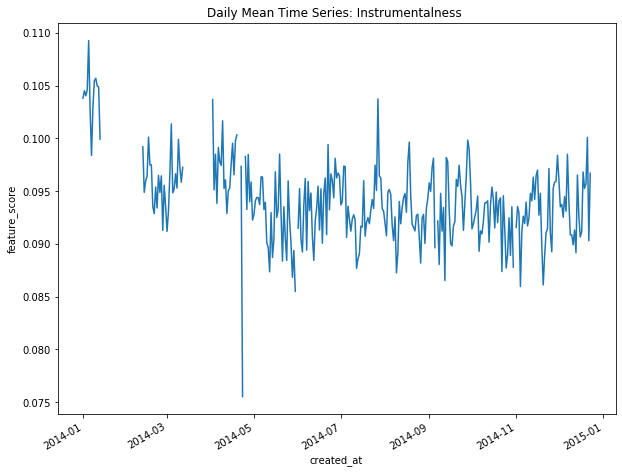

In [21]:
plt.figure(figsize=(10,8))
new_day['instrumentalness'].plot()
plt.title('Daily Mean Time Series: Instrumentalness ')
plt.ylabel('feature_score')

In [22]:
print(f" The maximum value for the mean 'instrumentalness' variable is {round(new_day['instrumentalness'].max(),4)}, and occured on {new_day['instrumentalness'].idxmax()}")
print(f" The minimum value for the mean 'instrumentalness' variable is {round(new_day['instrumentalness'].min(),4)}, and occured on {new_day['instrumentalness'].idxmin()}")
print(f" Dataset 'instrumentalness' mean: {round(sort['instrumentalness'].mean(),4)}")

 The maximum value for the mean 'instrumentalness' variable is 0.1093, and occured on 2014-01-05 00:00:00
 The minimum value for the mean 'instrumentalness' variable is 0.0755, and occured on 2014-04-23 00:00:00
 Dataset 'instrumentalness' mean: 0.0941


With Spotify defining the feature as having no vocals with a value of 1, we can see that the users in the sample prefer music with vocals, with the maximum daily mean value being 0.1093. This makes intuitive sense as almost all modern popular music contains vocals.  According to Spotify, even vocal tracks that behave as instrumentation, 'oohs and ahhs,' are treated as non-vocal. To obtain a high value close to 1 users would have to listen to genres such as classical or jazz, categories that are generally shunned by the average listener.  This chart suggests that the 'population listens to popular music.'  This is further supported with the mean of the dataset being 0.094.

**Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

Text(0, 0.5, 'feature_score')

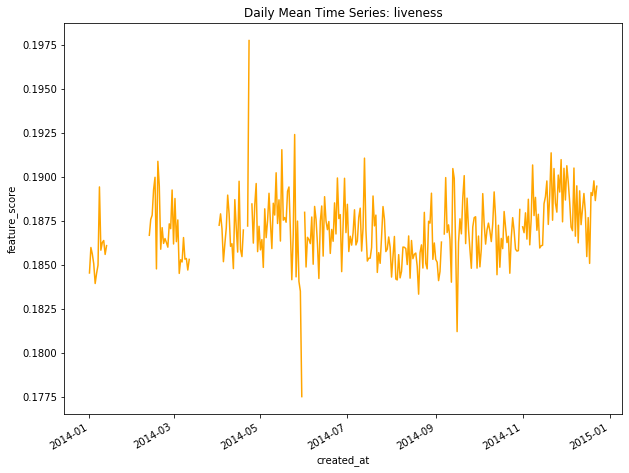

In [23]:
plt.figure(figsize=(10,8))
new_day['liveness'].plot(color='orange')
plt.title('Daily Mean Time Series: liveness')
plt.ylabel('feature_score')

In [24]:
print(f" The maximum value for the mean 'liveness' variable is {round(new_day['liveness'].max(),4)}, and occured on {new_day['liveness'].idxmax()}")
print(f" The manimum value for the mean 'liveness' variable is {round(new_day['liveness'].min(),4)}, and occured on {new_day['liveness'].idxmin()}")
print(f" Dataset 'liveness' mean: {round(sort['liveness'].mean(),4)}")

 The maximum value for the mean 'liveness' variable is 0.1978, and occured on 2014-04-23 00:00:00
 The manimum value for the mean 'liveness' variable is 0.1775, and occured on 2014-05-30 00:00:00
 Dataset 'liveness' mean: 0.187


With a liveness value of 0.8 being considered as 'providing strong likelihood that the track is live,' it seems as though the users prefer studio recorded music over recordings of live performances.  This could also be an artifact of the fact that the overwhleming majority of music being released if studio recorded, rather than a recording of a live performance intended for release.  It is also true that live performances recorded for mass release are usually from artists with high popularity, meaning that the sample size is smaller than the population are artists recording music, so there is less availability of live recordings.

**Speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

Text(0, 0.5, 'feature_score')

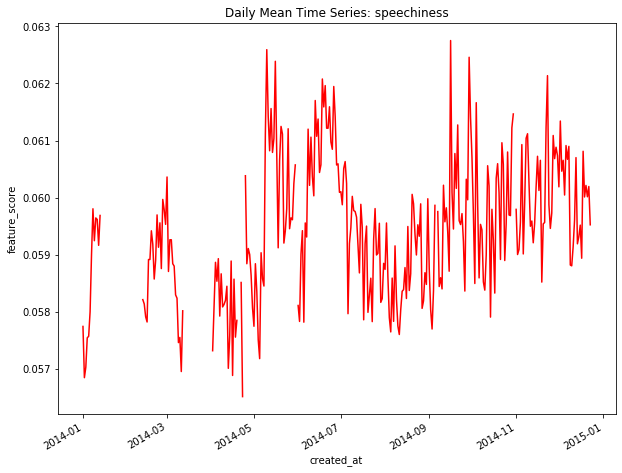

In [25]:
plt.figure(figsize=(10,8))
new_day['speechiness'].plot(color='red')
plt.title('Daily Mean Time Series: speechiness')
plt.ylabel('feature_score')


In [26]:
print(f" The maximum value for the mean 'speechiness' variable is {round(new_day['speechiness'].max(),4)}, and occured on {new_day['speechiness'].idxmax()}")
print(f" The manimum value for the mean 'speechiness' variable is {round(new_day['speechiness'].min(),4)}, and occured on {new_day['speechiness'].idxmin()}")
print(f" Dataset 'speechiness' mean: {round(sort['liveness'].mean(),4)}")

 The maximum value for the mean 'speechiness' variable is 0.0628, and occured on 2014-09-16 00:00:00
 The manimum value for the mean 'speechiness' variable is 0.0565, and occured on 2014-04-23 00:00:00
 Dataset 'speechiness' mean: 0.187


With music and non-speech-like tracks assigned a value of < .33 it is likely that users prefer not listening to speech-like forms of music such as rap.  This means listeners tend to listen to music that is sung and not spoken.  

**Danceability:** Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

Text(0, 0.5, 'feature_score')

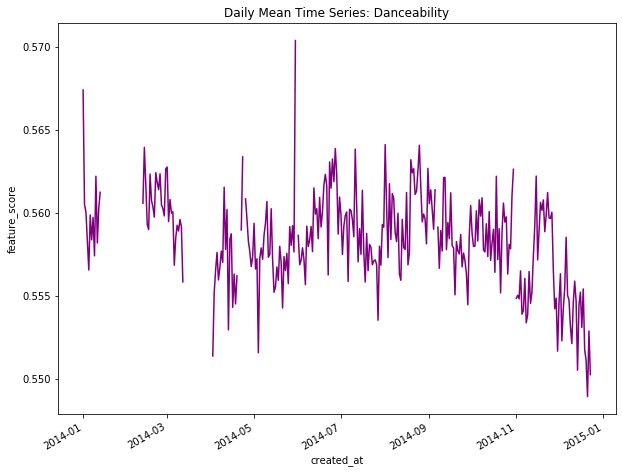

In [27]:
plt.figure(figsize=(10,8))
new_day['danceability'].plot(color='purple')
plt.title('Daily Mean Time Series: Danceability')
plt.ylabel('feature_score')

In [28]:
print(f" The maximum value for the mean 'danceability' variable is {round(new_day['danceability'].max(),4)}, and occured on {new_day['danceability'].idxmax()}")
print(f" The manimum value for the mean 'danceability' variable is {round(new_day['danceability'].min(),4)}, and occured on {new_day['danceability'].idxmin()}")
print(f" Dataset 'danceability' mean: {round(sort['danceability'].mean(),4)}")

 The maximum value for the mean 'danceability' variable is 0.5704, and occured on 2014-05-30 00:00:00
 The manimum value for the mean 'danceability' variable is 0.5489, and occured on 2014-12-21 00:00:00
 Dataset 'danceability' mean: 0.5583


Based on the combination of elements the define the 'danceability feature it seems that the population of users are listening to music right down the middle of 'danceable' and 'non-danceable' with a mean value of 0.55.

**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Text(0, 0.5, 'feature_score')

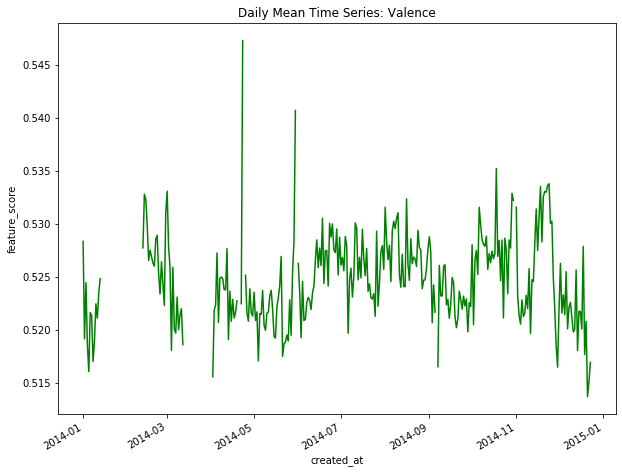

In [29]:
plt.figure(figsize=(10,8))
new_day['valence'].plot(color='green')
plt.title('Daily Mean Time Series: Valence')
plt.ylabel('feature_score')

In [30]:
print(f" The maximum value for the mean 'valence' variable is {round(new_day['valence'].max(),4)}, and occured on {new_day['valence'].idxmax()}")
print(f" The manimum value for the mean 'valence' variable is {round(new_day['valence'].min(),4)}, and occured on {new_day['valence'].idxmin()}")
print(f" Dataset 'valence' mean: {round(sort['valence'].mean(),4)}")

 The maximum value for the mean 'valence' variable is 0.5473, and occured on 2014-04-23 00:00:00
 The manimum value for the mean 'valence' variable is 0.5137, and occured on 2014-12-21 00:00:00
 Dataset 'valence' mean: 0.5247


All of the daily mean values for the valence show that people are listening to music that is neither super campy, or depressing.  It is right down the middle with all the values in the 0.5 - 0.55 range.

**Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

Text(0, 0.5, 'feature_score')

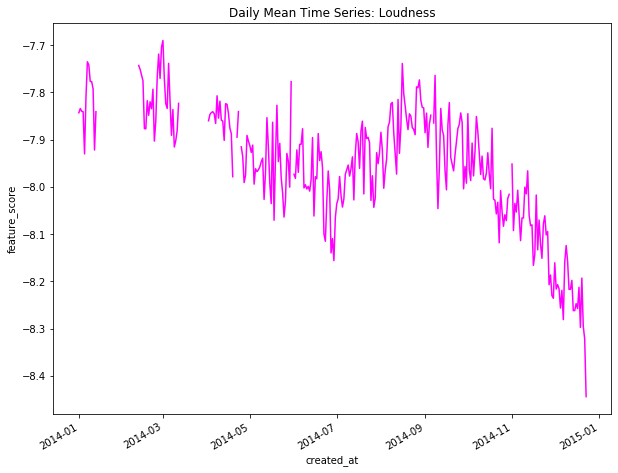

In [31]:
plt.figure(figsize=(10,8))
new_day['loudness'].plot(color='magenta')
plt.title('Daily Mean Time Series: Loudness')
plt.ylabel('feature_score')

In [32]:
print(f" The maximum value for the mean 'loudness' variable is {round(new_day['loudness'].max(),4)}, and occured on {new_day['loudness'].idxmax()}")
print(f" The manimum value for the mean 'loudness' variable is {round(new_day['loudness'].min(),4)}, and occured on {new_day['loudness'].idxmin()}")
print(f" Dataset 'valence' mean: {round(sort['loudness'].mean(),4)}")

 The maximum value for the mean 'loudness' variable is -7.6904, and occured on 2014-03-01 00:00:00
 The manimum value for the mean 'loudness' variable is -8.444, and occured on 2014-12-23 00:00:00
 Dataset 'valence' mean: -7.9583


This feature does not appear to offer any valuable information in a musical context.  'Loudness' is something that defined in the audio mixing stage of music production.  Even a track of whispering can be 'loud.' The range of values is narrrow indicating a form standardization most likely achieved in the mixing process.

**Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

Text(0, 0.5, 'feature_score')

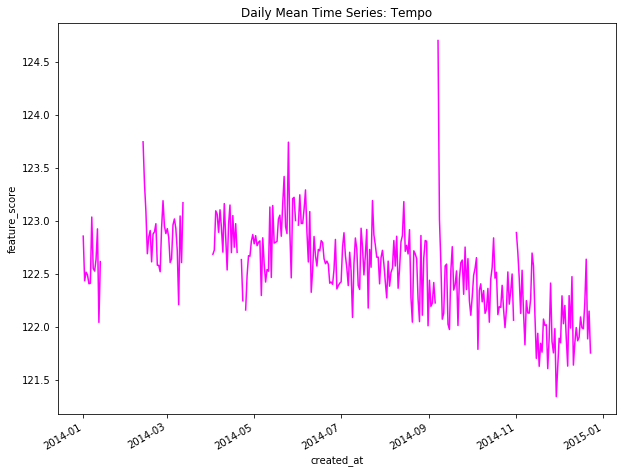

In [33]:
plt.figure(figsize=(10,8))
new_day['tempo'].plot(color='magenta')
plt.title('Daily Mean Time Series: Tempo')
plt.ylabel('feature_score')

In [34]:
print(f" The maximum value for the mean 'tempo' variable is {round(new_day['tempo'].max(),4)}, and occured on {new_day['tempo'].idxmax()}")
print(f" The manimum value for the mean 'tempo' variable is {round(new_day['tempo'].min(),4)}, and occured on {new_day['tempo'].idxmin()}")
print(f" Dataset 'tempo' mean: {round(sort['tempo'].mean(),4)}")

 The maximum value for the mean 'tempo' variable is 124.7008, and occured on 2014-09-07 00:00:00
 The manimum value for the mean 'tempo' variable is 121.3409, and occured on 2014-11-29 00:00:00
 Dataset 'tempo' mean: 122.5311


The mean values for tempo make sense as 120 BPM is a common value in popular music.  The mean value here indicates a a single beat roughly every half second.  

**Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Text(0, 0.5, 'feature_score')

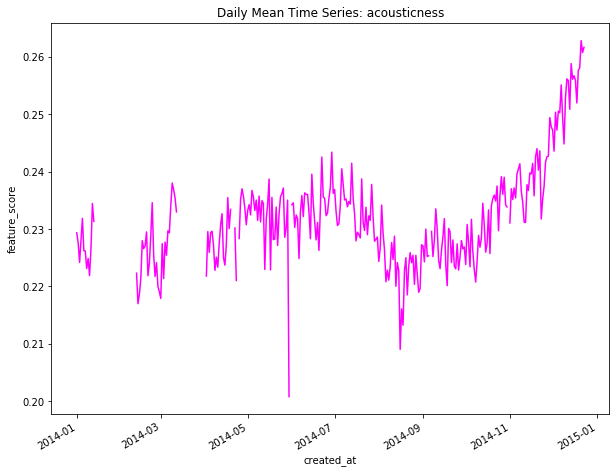

In [35]:
plt.figure(figsize=(10,8))
new_day['acousticness'].plot(color='magenta')
plt.title('Daily Mean Time Series: acousticness')
plt.ylabel('feature_score')

In [36]:
print(f" The maximum value for the mean 'acousticness' variable is {round(new_day['acousticness'].max(),4)}, and occured on {new_day['acousticness'].idxmax()}")
print(f" The manimum value for the mean 'acousticness' variable is {round(new_day['acousticness'].min(),4)}, and occured on {new_day['acousticness'].idxmin()}")
print(f" Dataset 'acousticness' mean: {round(sort['acousticness'].mean(),4)}")

 The maximum value for the mean 'acousticness' variable is 0.2629, and occured on 2014-12-21 00:00:00
 The manimum value for the mean 'acousticness' variable is 0.2008, and occured on 2014-05-30 00:00:00
 Dataset 'acousticness' mean: 0.2322


The mean values for 'acousticness' show that users tend to listen to digitally created music.  This makes sense as the overwhelming majority of music being produced in recent times is made digitally.

**Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

Text(0, 0.5, 'feature_score')

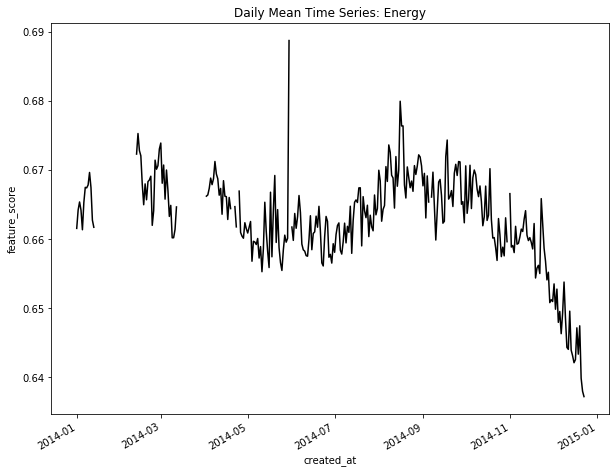

In [37]:
plt.figure(figsize=(10,8))
new_day['energy'].plot(color='black')
plt.title('Daily Mean Time Series: Energy')
plt.ylabel('feature_score')

In [38]:
print(f" The maximum value for the mean 'energy' variable is {round(new_day['energy'].max(),4)}, and occured on {new_day['energy'].idxmax()}")
print(f" The manimum value for the mean 'energy' variable is {round(new_day['energy'].min(),4)}, and occured on {new_day['energy'].idxmin()}")
print(f" Dataset 'energy' mean: {round(sort['energy'].mean(),4)}")

 The maximum value for the mean 'energy' variable is 0.6888, and occured on 2014-05-30 00:00:00
 The manimum value for the mean 'energy' variable is 0.6372, and occured on 2014-12-23 00:00:00
 Dataset 'energy' mean: 0.6627


With a mean value of 0.66, it appears that generally listeners enjoy listening to music that is slightly more upbeat.  This remains constant as the range of daily mean values is narrow.

## Relevant counting

The categorical columns: artist_id, track_id, and user_id can be plotted to see who occurs most.  The top 20 of each will be plotted for inspection.  This is somewhat meaningless from a qualitative perspective because the artist_id and track_id are hashed.  Therefore, there will be no way to see the actual names.

Text(0.5, 1.0, "Top 15 song ID's")

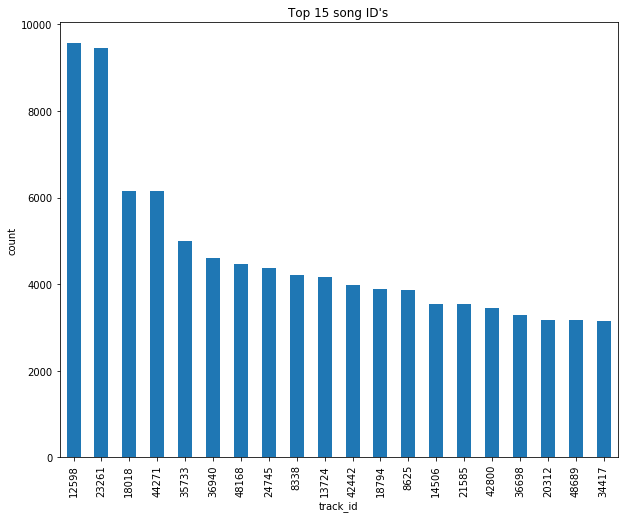

In [39]:
plt.figure(figsize=(10,8))
sort['tid_code'].value_counts().head(20).plot(kind='bar')
plt.xlabel('track_id')
plt.ylabel('count')
plt.title("Top 15 song ID's")

The 2 songs with the most plays occur more than 9000 times, respectively.  This suggests that the songs are popular among a wide variety of users.  Afterwords, the the two songs with the next highest count of appearances fall to roughly 600, and begin to slowly decline throughout the remainder of the songs.  Similar to TFIDF, these occurance counts can be used to generate weights for the features.  

Text(0.5, 1.0, "Top 15 user ID's")

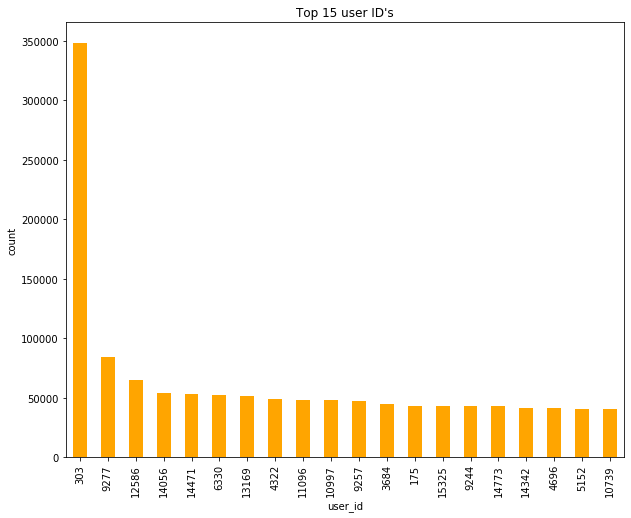

In [40]:
plt.figure(figsize=(10,8))
sort['uid_code'].value_counts().head(20).plot(kind='bar',color='orange')
plt.xlabel('user_id')
plt.ylabel('count')
plt.title("Top 15 user ID's")

From the bar chart of the top 15 user_id's present in the data we can see that a single user, user 303, accounts for roughly 350,000 of the listening events.  This translates to listening to a song every 1.5 minutes.  Modern music played for the radio is usually around 3 minutes long, so we know that there is something strange happening here. The next most active user is user 9277 and accoutns for alomst 9000 listening events.  From there, the count seems to slowly level off.  

In [41]:
check = sort[sort['uid_code'] == 303]

Text(0, 0.5, 'count')

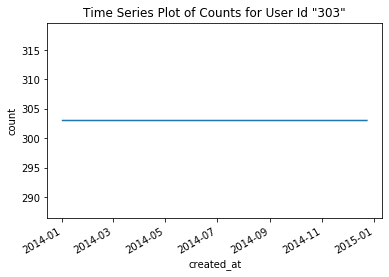

In [46]:
check['uid_code'].plot()
plt.title('Time Series Plot of Counts for User Id "303"')
plt.ylabel('count')

In [47]:
check.head(10)

,user_id,track_id,ol_score,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,artist_id,tag,count,uid_code,tid_code,aid_code
created_at,,,,,,,,,,,,,,,,,,,,
2014-01-01 05:55:29,15518784,cd15ccc7c692868532f83206bfe0f022,0.6,0.000013,0.3470,0.0466,0.551,0.525,-4.063,119.992,0.0263,0.913,0.0,0.0,97df8caf45c0d6692e0bc0273470b7c6,{'nowplaying'},2014,303,42305,7198
2014-01-01 05:57:22,15518784,cc1a46ee0446538ecf6b65db01c30cd8,0.6,0.000000,0.0931,0.0345,0.489,0.270,-4.197,92.526,0.0770,0.846,1.0,4.0,d7e3dd80f6f0f13230cd1d13025196ea,{'nowplaying'},1234,303,42095,10191
2014-01-01 05:57:47,15518784,19acf9a5cbed34743ce0ee42ef3cae3e,0.6,0.000000,0.1070,0.0612,0.627,0.509,-5.656,119.929,0.2260,0.713,0.0,11.0,cccf551faf8c9b7cea5ed774b7ba5a54,{'nowplaying'},1084,303,5345,9677
2014-01-01 06:00:07,15518784,3441b1031267fbb6009221bf47f9c5e8,0.6,0.000000,0.2200,0.1340,0.748,0.382,-4.136,130.021,0.0246,0.735,0.0,5.0,de49c1bedc81476b0a4cbb42ec9b1961,{'nowplaying'},1996,303,10829,10477
2014-01-01 06:01:04,15518784,206c8b79bd02beeea200879afc414879,0.6,0.000005,0.0811,0.0881,0.610,0.482,-6.657,134.978,0.0150,0.768,0.0,8.0,b49de804d0eef47a3fab0657c9d26cc6,{'nowplaying'},1144,303,6752,8592
2014-01-01 06:01:33,15518784,1a7a95e3845a6815060628e847d14362,0.6,0.000000,0.1810,0.0451,0.398,0.705,-5.559,186.752,0.1750,0.804,1.0,11.0,677a10b912c62d408a07910f9e481f34,{'nowplaying'},1630,303,5498,4923
2014-01-01 06:02:02,15518784,0fc1136e32ea77a75aa2cbc211552618,0.6,0.000000,0.8680,0.0697,0.641,0.474,-6.900,105.316,0.2280,0.861,1.0,4.0,19ebb0641a34aca13e49484abe68d935,{'nowplaying'},1300,303,3279,1268
2014-01-01 06:02:30,15518784,f28bc4ea0bd0165f5af5e53aaee574ed,0.6,0.000085,0.0833,0.0268,0.449,0.204,-6.762,139.627,0.0522,0.585,1.0,5.0,aa968850a9d255494612acd0552f8fcd,{'nowplaying'},2593,303,49947,8101
2014-01-01 06:02:59,15518784,9ef9ebdce8af0e267f64d9faface70cd,0.6,0.000000,0.1230,0.1710,0.658,0.532,-2.455,127.916,0.1660,0.919,1.0,5.0,b8bb24e26b0a9e72ec9f3bd9e17bcfd1,{'nowplaying'},1207,303,32787,8778


Upon further investigation of user 303, it appears that it may be some type of bot as it has a steady count of songs per day throughout the entire time period.  According to the data, this 'user' is listening to more than 303 songs per day. The user being assigned a code of '303' and the count per day of the user being 303 is a weird coincidence as the user code was generated from the hashed user ID.  Looking at the timestamp index we can see that a new event, with a different song, is created every half minute to a minute.  This user ID is the only one to clearly indicate it is a bot and not a real person.  Also interesting to note is that there are no breaks in the data for when the web scaper was inactive.  Whereas all of the other time series plots, for the features and event counts per day, show gaps.  For the aforementioned reasons, this 'user' will be removed from the dataset prior to creating the user-item matrix.

Text(0.5, 1.0, "Top 15 Artist ID's")

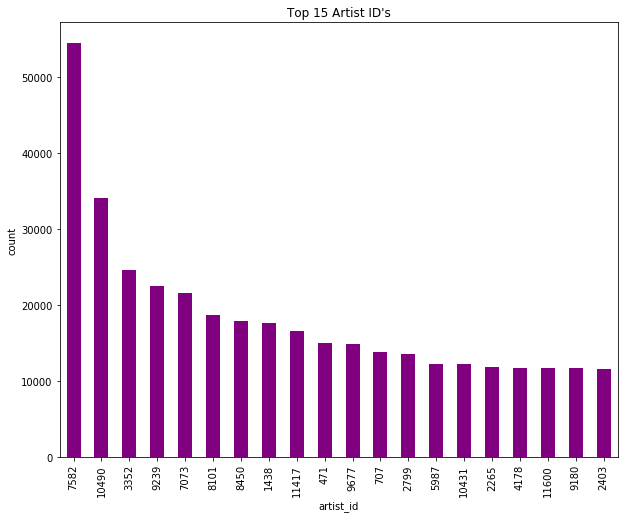

In [174]:
plt.figure(figsize=(10,8))
sort['aid_code'].value_counts().head(20).plot(kind='bar',color='purple')
plt.xlabel('artist_id')
plt.ylabel('count')
plt.title("Top 15 Artist ID's")

The artist_id occurance count shows artist '7582' appears in a listening event over 55,000 times, with the next most popular artist having around 35,000 plays.  Since we do not have access to the actual artist name we have to assume that these two artists are of the worlds most famous stars.  After these top artists, the count slowly declines and begins to level off somewhere arounf 12,000 appearances.  

In [50]:
top_artist = sort[sort['aid_code'] ==7582]['tid_code'].value_counts()

In [51]:
top_artist

7288     2118
12982    2075
52484    1957
37667    1880
18364    1233
         ... 
51681      12
14772      12
39547      11
33158      11
39842      11
Name: tid_code, Length: 78, dtype: int64

Artist '7582' has 78 unique songs in the dataset.  This must be a prolific musician.  Their most popular track had 2118 plays over the course of the year.

In [242]:
df.columns

Index(['user_id', 'track_id', 'created_at', 'ol_score', 'instrumentalness',
       'liveness', 'speechiness', 'danceability', 'valence', 'loudness',
       'tempo', 'acousticness', 'energy', 'mode', 'key', 'artist_id', 'tag',
       'count', 'uid_code', 'tid_code', 'aid_code'],
      dtype='object')

In [52]:
sort.head()

,user_id,track_id,ol_score,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,artist_id,tag,count,uid_code,tid_code,aid_code
created_at,,,,,,,,,,,,,,,,,,,,
2014-01-01 05:54:21,81496937,cd52b3e5b51da29e5893dba82a418a4b,0.6,0.004790,0.180,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,1.0,6.0,b2980c722a1ace7a30303718ce5491d8,"{'postpunk', 'deathrock', 'nowplaying'}",28,4121,42353,8489
2014-01-01 05:54:24,97675221,33f95122281f76e7134f9cbea3be980f,0.6,0.000000,0.143,0.0292,0.324,0.333,-5.647,74.101,0.23900,0.574,1.0,7.0,557ce373bd29743eb00a3723ab19ebe8,{'nowplaying'},25,4696,10760,4076
2014-01-01 05:54:25,452285741,8bd5206b84c968eda0af8bc86d6ab1d1,0.6,0.000000,0.110,0.0375,0.641,0.912,-4.271,93.010,0.02680,0.787,1.0,0.0,f965ec352eb8c0efc0af46244754942f,{'nowplaying'},247,11096,28822,11749
2014-01-01 05:54:28,65086276,23ced06ca57d37fa749b1595bc7ed1a4,0.6,0.000006,0.362,0.1340,0.554,0.677,-4.271,126.045,0.02160,0.878,1.0,3.0,a3abd1e016fdba82a91379b7e2b9ab69,{'nowplaying'},1708,3558,7451,7743
2014-01-01 05:54:32,442477849,fda40c07a07a15648760431850efc3d8,0.6,0.000040,0.110,0.0675,0.387,0.197,-6.835,81.354,0.03720,0.898,1.0,8.0,6f8ce038bc50a5372fcaf86e4b300bb6,{'nowplaying'},242,10997,52219,5291


Text(0, 0.5, 'count')

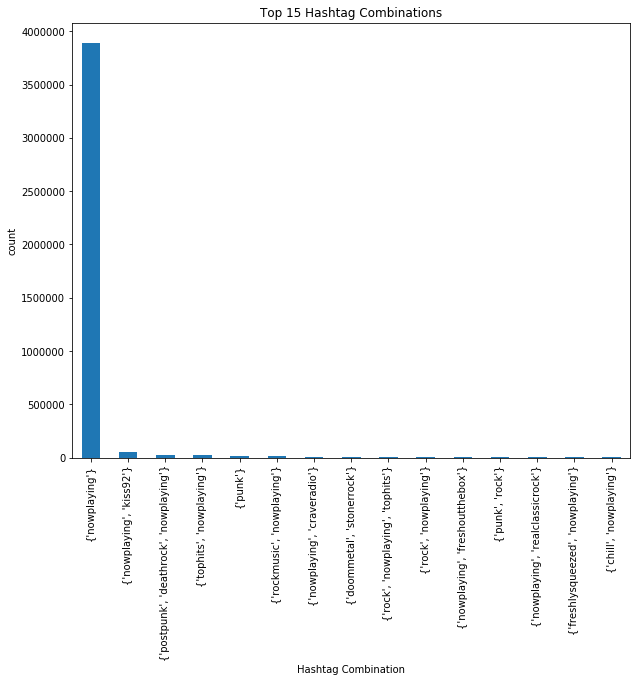

In [53]:
#plot top 15 hashtag combinations
plt.figure(figsize=(10,8))
sort['tag'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Hashtag Combinations')
plt.xlabel('Hashtag Combination')
plt.ylabel('count')

The single tag of 'nowplaying' appears overwhelmingly more than the other combinations.  In light of this, we will remove that from the chart.

In [209]:
t = tag_list.to_frame()

In [213]:
t = t.reset_index()

In [219]:
no_np = t.drop(0)

In [228]:
no_np.columns

Index(['index', 'tag'], dtype='object')

In [229]:
no_np.columns = ['tag_combo','count']

In [231]:
top_15 = no_np.head(15)

In [232]:
top_15

,tag_combo,count
1,"{'nowplaying', 'kiss92'}",51226
2,"{'postpunk', 'deathrock', 'nowplaying'}",22491
3,"{'tophits', 'nowplaying'}",20234
4,{'punk'},16452
5,"{'rockmusic', 'nowplaying'}",12848
6,"{'nowplaying', 'craveradio'}",9319
7,"{'doommetal', 'stonerrock'}",4426
8,"{'rock', 'nowplaying', 'tophits'}",4318
9,"{'rock', 'nowplaying'}",3814
10,"{'nowplaying', 'freshoutthebox'}",3509


Text(0.5, 1.0, 'Top 15 Hashtag Combinations (without:"nowplaying")')

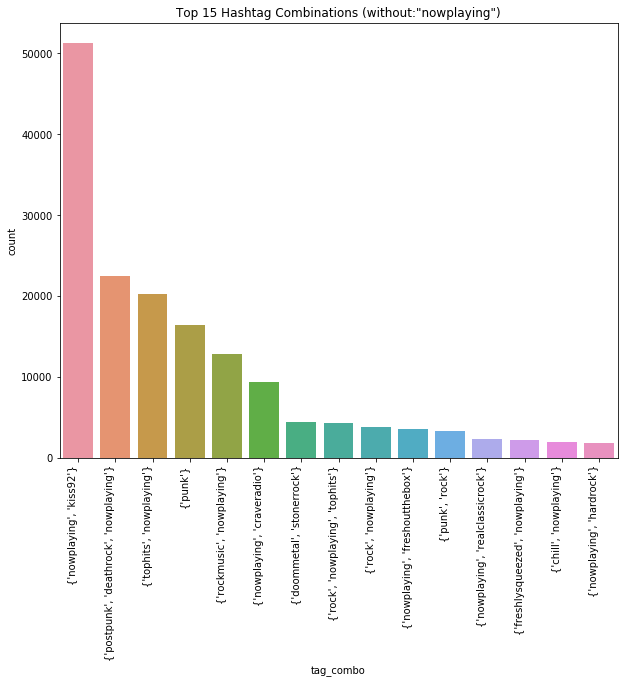

In [240]:
plt.figure(figsize=(10,8))
tag_plot = sns.barplot(x='tag_combo',y='count',data=top_15)
tag_plot.set_xticklabels(tag_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title('Top 15 Hashtag Combinations (without:"nowplaying")')

Most of the top 15 hashtag combinations include the 'nowplaying' hashtag combined with another.  Most of the other hashtags in the combinations include a 'rock' term, or a hastag associated with rock: "deathrock", "punk", 'rockmusic", 'doommetal', 'realclassicrock.'  This is inline with what we saw for the daily mean Spotify features.  Music that is in the middle of 'danceability', and above average 'energy.' 

## Content Feature Correlations

Included are some jointplots showing how various features relate to one another.  Features that seemed like they my be correlated were plotted.  However, the only features showing any type of correlation are the 'energy' and 'loudness features.  It appears they have somewhat of a linear correlation as each feature increases.  This makes sense as the two features can be looked at almost the same.

In [245]:
df.columns

Index(['user_id', 'track_id', 'created_at', 'ol_score', 'instrumentalness',
       'liveness', 'speechiness', 'danceability', 'valence', 'loudness',
       'tempo', 'acousticness', 'energy', 'mode', 'key', 'artist_id', 'tag',
       'count', 'uid_code', 'tid_code', 'aid_code'],
      dtype='object')

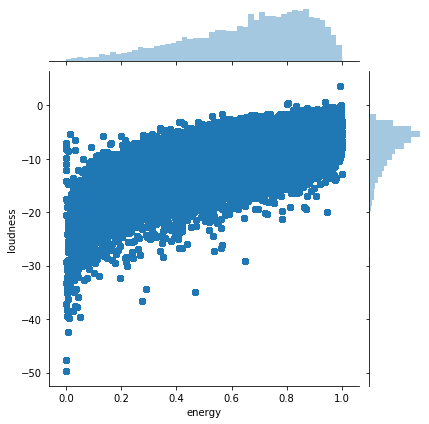

In [244]:
#Correlation plot with energy and loudness
sns.jointplot(x='energy',y='loudness',data=df,kind='scatter')

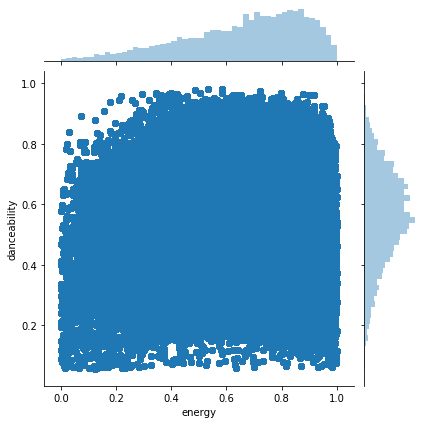

In [246]:
#danceability and energy
sns.jointplot(x='energy',y='danceability',data=df,kind='scatter')

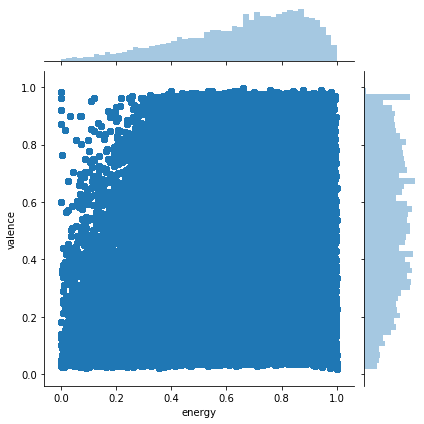

In [247]:
#energy and valence
sns.jointplot(x='energy',y='valence',data=df,kind='scatter')

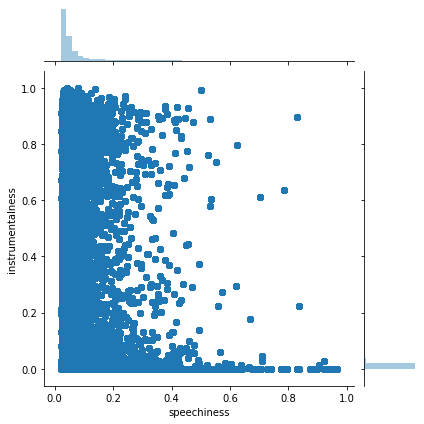

In [248]:
#speechiness and instrumentalness
sns.jointplot(x='speechiness',y='instrumentalness',data=df,kind='scatter')